**NHẬN DIỆN CHỮ VIẾT TAY (REGCONIZING HAND-WRITTEN DIGITS)**


**Lớp CS114.L21**

**Nhóm**
1.   Trần Phan Nhật Kha - 19521655
2.   Trần Gia Nghĩa - 19521901
3.   Võ Tá Lâm - 19521744

Nguồn tham khảo: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

Thông qua ví dụ sau đây cho thấy cách scikit-learn có thể sử dụng để nhận dạng hình ảnh của các chữ số viết tay từ 0-9.

# Import and Plot Data

 **IMPORT CÁC THƯ VIỆN CẦN THIẾT**

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


**TẢI DỮ LIỆU VÀ XEM THÔNG TIN SƠ BỘ TẬP DỮ LIỆU**

In [ ]:
#Tải tập dữ liệu từ thư viện sklearn
digits = datasets.load_digits()
#In ra thông tin sơ bộ của tập dữ liệu
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**BỘ DỮ LIỆU CHỮ SỐ**

Tập dữ liệu chữ số bao gồm những hình ảnh của các chữ số có độ phân giải là 8x8 pixel. Các thuộc tính ***images*** của tập dữ liệu được lưu trữ trong một mảng có kích thước 8x8 thể hiện thang độ xám của mỗi hình. Chúng ta sử dụng mảng này để trực quan hóa 4 hình ảnh đầu tiên. Thuộc tính ***target*** của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới.

**Lưu ý**: nếu chúng ta làm việc với tệp hình ảnh (ví dụ: tệp 'png'), sử dụng *matplotlib.pyplot.imread* để tải hình ảnh.

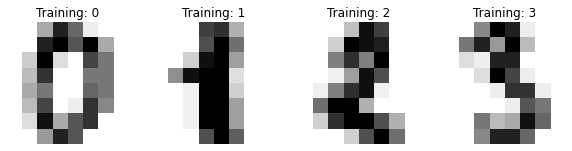

In [ ]:
#Xem hình ảnh 4 chữ số đầu tiên trong dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    image
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Split and Train Data

**PHÂN LỚP**

Để có thể áp dụng bộ phân loại trên tập dữ liệu này, chúng ta cần làm phẳng các hình ảnh, chuyển từng mảng 2-D thành thể hiện thang độ xám từ kích thước (8,8) sang kích thước (64,). Sau đó toàn bộ dữ liệu sẽ có kích thướng (***n_samples***, ***n_features***) trong đó ***n_samples*** là số lượng hình ảnh và ***n_features*** là tổng số pixels trong mỗi hình ảnh.

Sau đó, chúng ta có thể chia dữ liệu thành ***tập dữ liệu huấn luyện*** (train subsets) và ***tập dữ liệu thử nghiệm*** (test subsets). Tiếp theo, chúng ta có thể fit ***tập dữ liệu huấn luyện*** bằng ***support vector classifier***. Sau khi huấn luyện xong, chúng ta có thể sử dụng bộ phân loại này để dự đoán giá trị của các chữ số trong ***tập dữ liệu thử nghiệm***.

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Dưới đây, chúng ta khái quát hóa 4 chữ số đầu tiên trong tập test và hiển thị giá trị chữ số dự đoán của chúng.

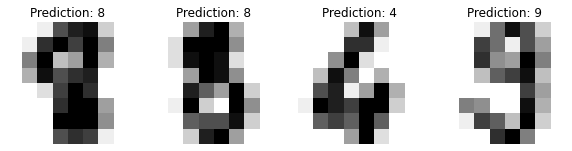

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

classification_report xây dựng một văn bản báo cáo hiển thị các chỉ số phân loại chính.

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Chúng ta cũng có thể vẽ một confusion matrix giữa các giá trị chữ số thực và giá trị chữ số dự đoán.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


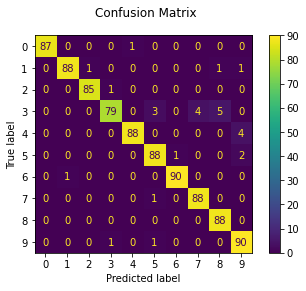

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


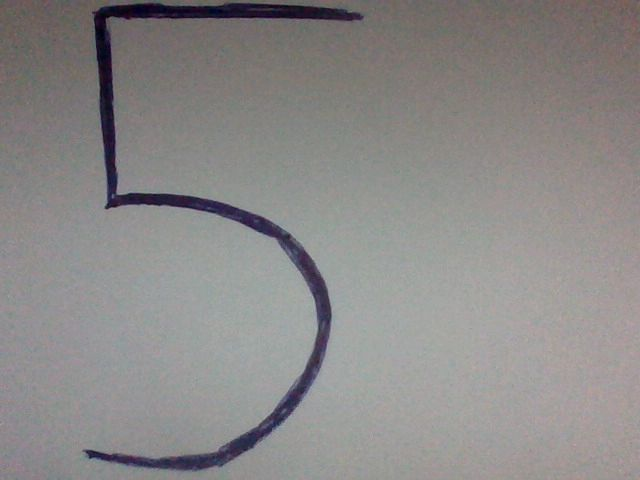

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **Pre-process and Predict Image**

In [ ]:
import cv2
import numpy as np
from skimage.io import imread
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from PIL import Image, ImageOps

In [ ]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

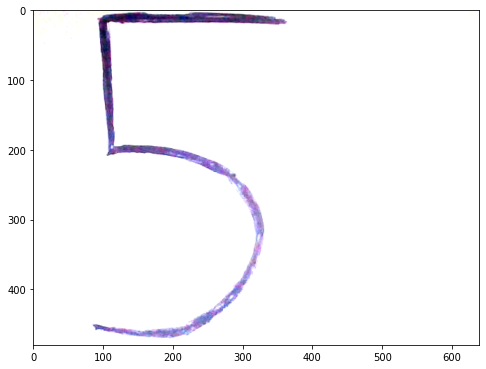

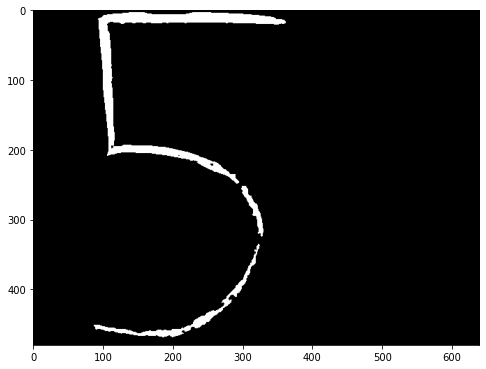

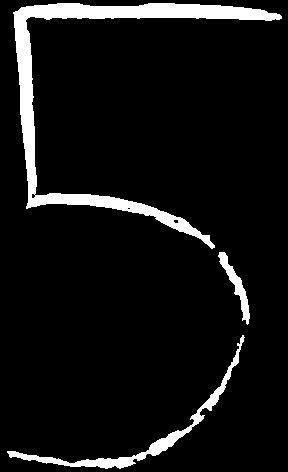

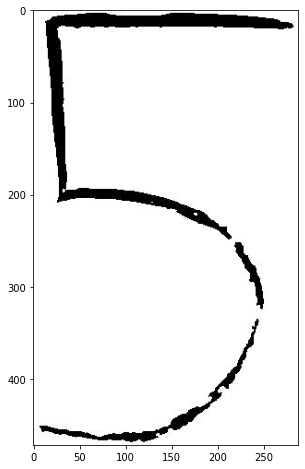

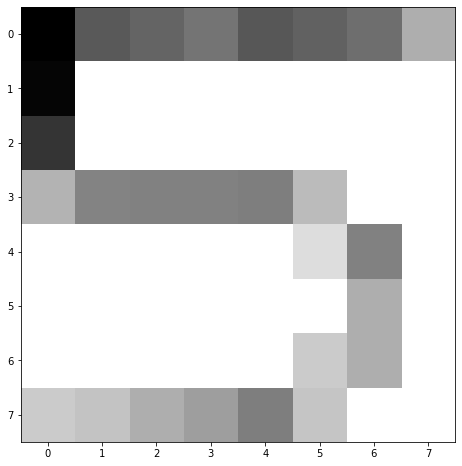

Predict:  [5]


In [ ]:
img = imread("/content/photo.jpg")
#Cân bằng sáng hình ảnh
yen_threshold = threshold_yen(img)
bright = rescale_intensity(img, (0, yen_threshold), (0, 255))
plt.figure(figsize=(8, 8))
plt.imshow(bright)
plt.show()

image_text_black = "temp_b.jpg"
image_text_white = "temp_w.jpg"

#Chuyển ảnh về dạng trắng đen (nền đen, số trắng)
gray_image = cv2.cvtColor(bright, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray_image,(5,5),0)
ret,th = cv2.threshold(blur,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(8, 8))
plt.imshow(th, cmap=plt.cm.gray_r)
plt.show()
cv2.imwrite(image_text_black, th)

#Đảo ngược màu sắc sang nền trắng số đen
image = Image.open(image_text_black)
image_result = ImageOps.invert(image)
image_result.save(image_text_white)


#Đưa ảnh về 8x8 và chuyển hóa thành ma trận dạng (64,)
image = cv2.imread(image_text_white, cv2.IMREAD_GRAYSCALE)
image = crop_image(image)
cv2_imshow(image)
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()
image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
image_8_8 = image_8_8 / 15
image_predict = image_8_8.reshape(1,64)

#Dự đoán
plt.figure(figsize=(8, 8))
plt.imshow(image_8_8, cmap=plt.cm.binary)
plt.show()
result = clf.predict(image_predict)
print("Predict: ",result)